In [21]:
import pandas as pd
import numpy as np

In [22]:
data = pd.read_csv("summer.csv")
df = pd.DataFrame(data)

In [23]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [24]:
df.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

In [25]:
df.dropna(axis=0, inplace =True)

In [26]:
df.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       0
Gender        0
Event         0
Medal         0
dtype: int64

##**1.) In how many cities Summer olympics is held so far**

In [27]:
df['City'].unique().size

22

There are 22 unique cities where, summer olympics are held so far.

##**2.) Which sport is having most number of gold medals so far**

In [28]:
new = df[(df.Medal == 'Gold')]
new.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
6,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold
9,1896,Athens,Aquatics,Swimming,"NEUMANN, Paul",AUT,Men,400M Freestyle,Gold
13,1896,Athens,Athletics,Athletics,"BURKE, Thomas",USA,Men,100M,Gold


In [29]:
new.groupby(['Sport'])['Medal'].count().sort_values(ascending = False).head()

Sport
Aquatics      1421
Athletics     1214
Rowing         890
Gymnastics     820
Fencing        552
Name: Medal, dtype: int64

These are the top five sports having most number of gold.

##**3.) Which sport is having most number of medals so far?(top 5)**

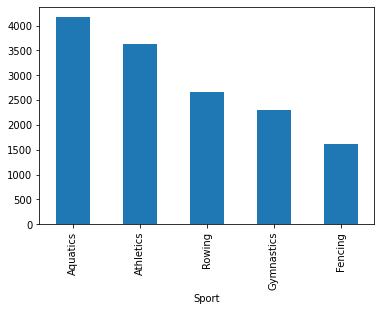

In [30]:
df.groupby(['Sport'])['Medal'].count().sort_values(ascending=False).head().plot.bar()


These are top five sport having most number of medals.

##**4.) Which player has won most number of medals?(top5)**

In [31]:
med = df.groupby(['Athlete'])['Medal'].count().sort_values(ascending = False).head()
med

Athlete
PHELPS, Michael         22
LATYNINA, Larisa        18
ANDRIANOV, Nikolay      15
ONO, Takashi            13
MANGIAROTTI, Edoardo    13
Name: Medal, dtype: int64

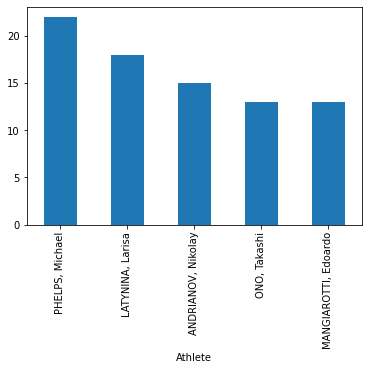

In [32]:
med.plot.bar()

##**5.) Which player has won most number of gold medals?(Top5)**

In [33]:
new = df[(df.Medal == 'Gold')]
new.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
6,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold
9,1896,Athens,Aquatics,Swimming,"NEUMANN, Paul",AUT,Men,400M Freestyle,Gold
13,1896,Athens,Athletics,Athletics,"BURKE, Thomas",USA,Men,100M,Gold


In [34]:
gld_data = new.groupby(['Athlete'])['Medal'].count().sort_values(ascending = False).head()
gld_data

Athlete
PHELPS, Michael     18
LATYNINA, Larisa     9
SPITZ, Mark          9
LEWIS, Carl          9
NURMI, Paavo         9
Name: Medal, dtype: int64

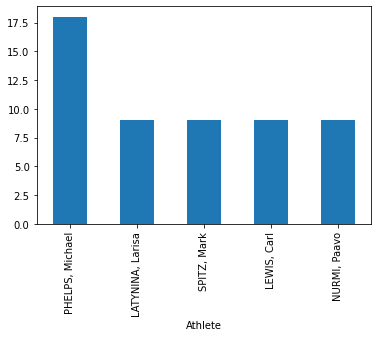

In [35]:
gld_data.plot.bar()

##**6.) In which year India won first gold medal in summer olympics?**

In [36]:
IND_olm = df[(df.Country =='IND')& (df.Medal=='Gold')]
IND_olm.head(5)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
5512,1928,Amsterdam,Hockey,Hockey,"ALLEN, Richard James",IND,Men,Hockey,Gold
5513,1928,Amsterdam,Hockey,Hockey,"CHAND, Dyan",IND,Men,Hockey,Gold
5514,1928,Amsterdam,Hockey,Hockey,"GATELEY, Maurice A.",IND,Men,Hockey,Gold
5515,1928,Amsterdam,Hockey,Hockey,"GILL, K. S.",IND,Men,Hockey,Gold
5516,1928,Amsterdam,Hockey,Hockey,"GOODSIR-CULLEN, William John",IND,Men,Hockey,Gold



First gold medal by india was won in 1928

##**7.) Which event is most popular in terms on number of players? (top 5)**

In [37]:
event =df.groupby(['Event'])['Athlete'].count().sort_values(ascending=False).head()
event

Event
Football            1497
Hockey              1422
Team Competition    1147
Basketball          1012
Handball             973
Name: Athlete, dtype: int64

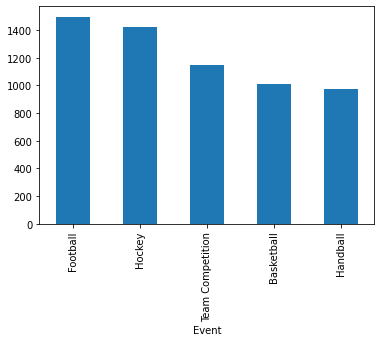

In [38]:
event.plot.bar()

##**8.) Which sport is having most female gold medalists?(top 5)**

In [39]:
new =df[(df.Gender=='Women')&(df.Medal=='Gold')]
new.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
417,1900,Paris,Golf,Golf,"ABBOTT, Margaret Ives",USA,Women,Individual,Gold
641,1900,Paris,Tennis,Tennis,"COOPER, Charlotte",GBR,Women,Mixed Doubles,Gold
649,1900,Paris,Tennis,Tennis,"COOPER, Charlotte",GBR,Women,Singles,Gold
710,1904,St Louis,Archery,Archery,"HOWELL, Matilda Scott",USA,Women,Double Columbia Round (50Y - 40Y - 30Y),Gold
713,1904,St Louis,Archery,Archery,"HOWELL, Matilda Scott",USA,Women,Double National Round (60Y - 50Y),Gold


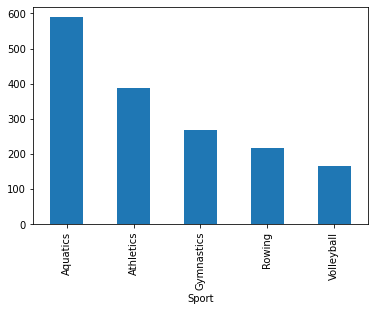

In [40]:
type(new)
new.groupby(['Sport'])['Athlete'].count().sort_values(ascending=False).head().plot.bar()


These are the five sports having most female Gold medalists.